In [1]:
import sympy as sym
import jax.numpy as jnp

from sympy import factorial
from sympy.plotting import plot
from sympy.series.series import series

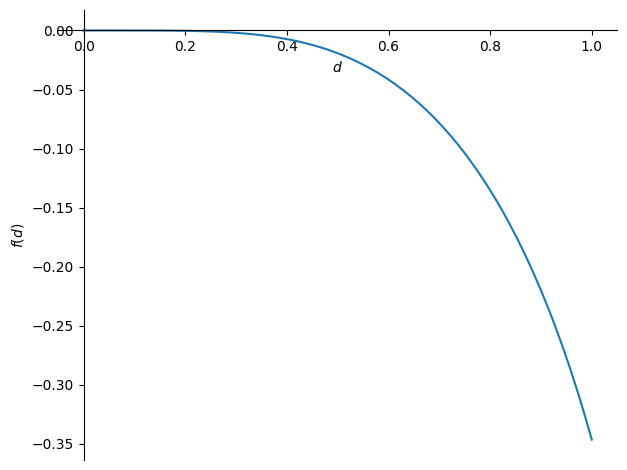

In [6]:
p = 2
exp_multiplier = -sym.sqrt(2 * p + 1)
coefficients = [factorial(p + i) / (factorial(i) * factorial(p - i)) * (sym.sqrt(8 * p + 4))**(p - i) for i in range(p + 1)]
powers = list(range(p,-1,-1))
norm_cons = factorial(p)/factorial(2*p)


d = sym.symbols('d')
matern = norm_cons*sum([c * (d**power) for c,power in zip(coefficients,powers)])*sym.exp(exp_multiplier * d)

S = series(sym.log(matern),d,0,2*p+1).removeO()

plot(matern - sym.exp(S),(d,0,1))

In [53]:
def get_matern(p):
    exp_multiplier = -sym.sqrt(2 * p + 1)
    coefficients = [factorial(p + i) / (factorial(i) * factorial(p - i)) * (sym.sqrt(8 * p + 4))**(p - i) for i in range(p + 1)]
    powers = list(range(p,-1,-1))
    norm_cons = factorial(p)/factorial(2*p)


    d = sym.symbols('d')
    matern = norm_cons*sum([c * (d**power) for c,power in zip(coefficients,powers)])*sym.exp(exp_multiplier * d)
    diff_matern = sym.diff(matern,d)
    return matern,sym.simplify(diff_matern/sym.exp(exp_multiplier * d))

In [54]:
a,b = get_matern(3)

In [57]:
d_c = sym.collect(b, sym.symbols('d'))

In [58]:
d_c

7*d*(-7*d**2 - 3*sqrt(7)*d - 3)/15

In [55]:
sym.Poly(b,sym.symbols('d'))

Poly(-49/15*d**3 - 7*sqrt(7)/5*d**2 - 7/5*d, d, domain='EX')